In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#plt.style.use('fivethirtyeight')

In [2]:
matches = pd.read_csv('ipldata/matches.csv')
deliveries = pd.read_csv('ipldata/deliveries.csv')

In [3]:
matches.shape

(756, 18)

In [4]:
deliveries.shape

(179078, 21)

In [9]:
print(deliveries.columns)

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')


In [6]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [10]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [12]:
matches['season'].value_counts()

2013    76
2012    74
2011    73
2019    60
2018    60
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

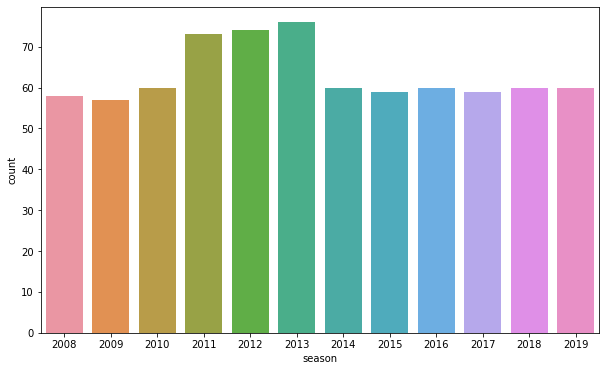

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(data=matches, x='season')

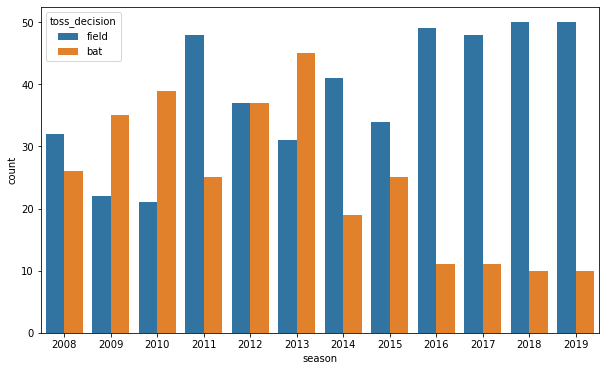

In [19]:
# how toss decision varied over seasons
plt.figure(figsize=(10,6))
sns.countplot(data=matches, x='season', hue='toss_decision')

In [22]:
temp_df = matches[matches['toss_winner'] == matches['winner']]

In [23]:
temp_df.shape

(393, 18)

In [26]:
slices = [len(temp_df), len(matches) - len(temp_df)]

In [27]:
slices

[393, 363]

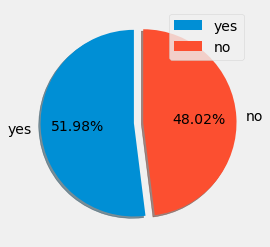

In [42]:
# team who wins the toss, whether they win or loss the match
#labels = ['yes','no']
plt.pie(slices,startangle=90,labels=['yes','no'],autopct='%.2f%%',shadow=True,explode=[0,0.1])
plt.legend()
plt.show()

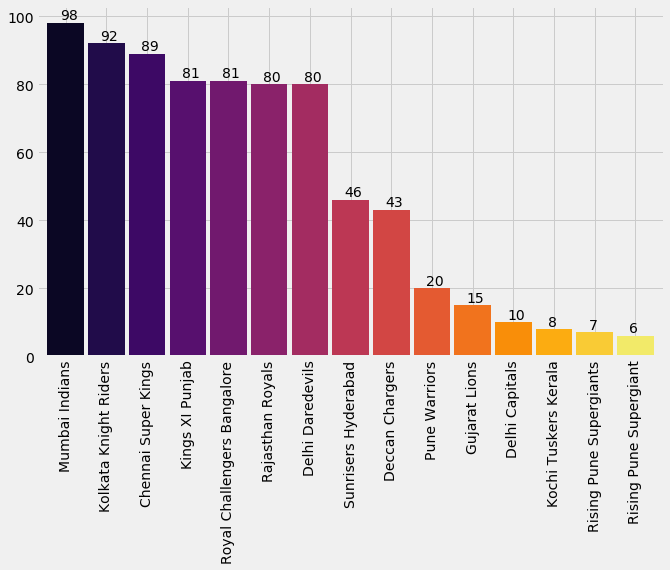

In [159]:
# most number of toss winners
# matches['toss_winner'].value_counts().plot.bar()
plt.figure(figsize=(10,6))
ax = matches['toss_winner'].value_counts().plot.bar(width=0.9, color=sns.color_palette('inferno',15))

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + 0.3, p.get_height() + 1))

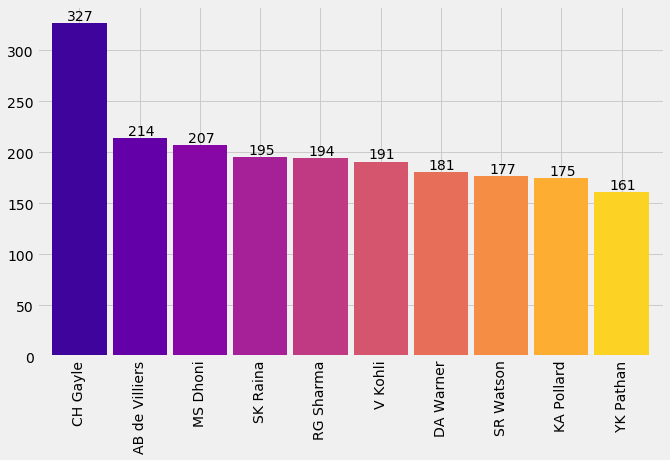

In [165]:
# most sixes
plt.figure(figsize=(10,6))
six_data = deliveries[deliveries['batsman_runs'] == 6]
ax = six_data['batsman'].value_counts()[:10].plot.bar(width=0.9, color=sns.color_palette('plasma',10))

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 3))

In [147]:
data = deliveries.groupby('batsman')['batsman_runs'].sum()

In [150]:
data.sort_values(ascending=False)[:10]

batsman
V Kohli           5434
SK Raina          5415
RG Sharma         4914
DA Warner         4741
S Dhawan          4632
CH Gayle          4560
MS Dhoni          4477
RV Uthappa        4446
AB de Villiers    4428
G Gambhir         4223
Name: batsman_runs, dtype: int64

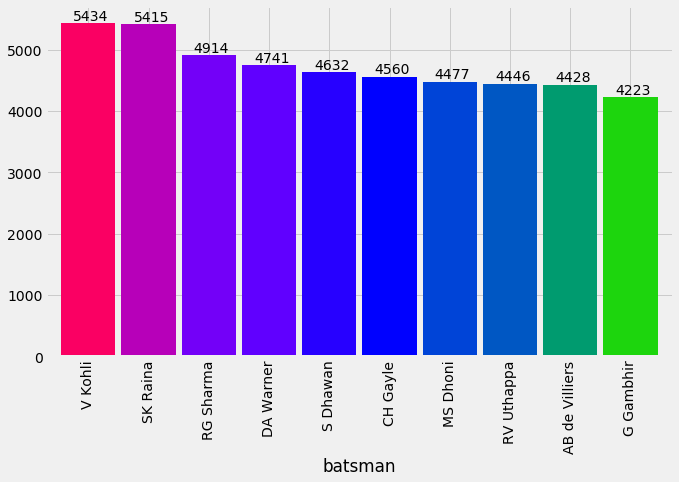

In [164]:
plt.figure(figsize=(10,6))
ax = deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False)[:10].plot.bar(width=0.9, color=sns.color_palette('prism',10))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + 0.2, p.get_height() + 50))

In [51]:
data = deliveries.groupby(('match_id','batsman'))['batsman_runs'].sum()

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """Entry point for launching an IPython kernel.


In [54]:
data.sort_values(ascending=False)[:10]

match_id  batsman       
411       CH Gayle          175
60        BB McCullum       158
562       AB de Villiers    133
620       AB de Villiers    129
372       CH Gayle          128
206       M Vijay           127
36        DA Warner         126
516       V Sehwag          122
243       PC Valthaty       120
279       V Sehwag          119
Name: batsman_runs, dtype: int64

/anaconda3/envs/new/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  


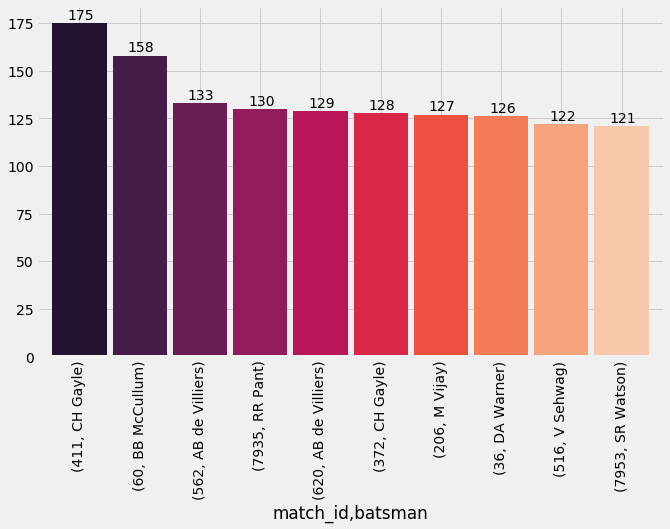

In [172]:
plt.figure(figsize=(10,6))
ax = deliveries.groupby(('match_id','batsman'))['batsman_runs'].sum().sort_values(ascending=False)[:10].plot.bar(width=0.9, color=sns.color_palette('rocket',10))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 2))